# Practical example. Audiobooks

## Problem

You are given data from an Audiobook app. Logically, it relates only to the audio versions of books. Each customer in the database has made a purchase at least once, that's why he/she is in the database. We want to create a machine learning algorithm based on our available data that can predict if a customer will buy again from the Audiobook company.

The main idea is that if a customer has a low probability of coming back, there is no reason to spend any money on advertizing to him/her. If we can focus our efforts ONLY on customers that are likely to convert again, we can make great savings. Moreover, this model can identify the most important metrics for a customer to come back again. Identifying new customers creates value and growth opportunities.

You have a .csv summarizing the data. There are several variables: Customer ID, Book length in mins_avg (average of all purchases), Book length in minutes_sum (sum of all purchases), Price Paid_avg (average of all purchases), Price paid_sum (sum of all purchases), Review (a Boolean variable), Review (out of 10), Total minutes listened, Completion (from 0 to 1), Support requests (number), and Last visited minus purchase date (in days).

So these are the inputs (excluding customer ID, as it is completely arbitrary. It's more like a name, than a number).

The targets are a Boolean variable (so 0, or 1). We are taking a period of 2 years in our inputs, and the next 6 months as targets. So, in fact, we are predicting if: based on the last 2 years of activity and engagement, a customer will convert in the next 6 months. 6 months sounds like a reasonable time. If they don't convert after 6 months, chances are they've gone to a competitor or didn't like the Audiobook way of digesting information. 

The task is simple: create a machine learning algorithm, which is able to predict if a customer will buy again. 

This is a classification problem with two classes: won't buy and will buy, represented by 0s and 1s. 

Good luck!

## Create the machine learning algorithm



### Import the relevant libraries

In [111]:
# we must import the libraries once again since we haven't imported them in this file
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load Data

In [112]:
# let's import and visualise the data

data = pd.read_csv('Audiobooks_data.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,873,2160.0,2160,10.13,10.13,0,8.91,0.00,0.0,0,0,1
1,611,1404.0,2808,6.66,13.33,1,6.50,0.00,0.0,0,182,1
2,705,324.0,324,10.13,10.13,1,9.00,0.00,0.0,1,334,1
3,391,1620.0,1620,15.31,15.31,0,9.00,0.00,0.0,0,183,1
4,819,432.0,1296,7.11,21.33,1,9.00,0.00,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14079,27398,2160.0,2160,7.99,7.99,0,8.91,0.00,0.0,0,54,0
14080,28220,1620.0,1620,5.33,5.33,1,9.00,0.61,0.0,0,4,0
14081,28671,1080.0,1080,6.55,6.55,1,6.00,0.29,0.0,0,29,0
14082,31134,2160.0,2160,6.14,6.14,0,8.91,0.00,0.0,0,0,0


In [113]:
# look at the data stats

data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000
mean,16772.491551,1591.281685,1678.608634,7.103791,7.543805,0.160750,8.909795,0.125659,118.586745,0.070222,61.935033,0.158833
std,9691.807248,504.340663,654.838599,4.931673,5.560129,0.367313,0.643406,0.241206,268.731935,0.472157,88.207634,0.365533
min,2.000000,216.000000,216.000000,3.860000,3.860000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8368.000000,1188.000000,1188.000000,5.330000,5.330000,0.000000,8.910000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16711.500000,1620.000000,1620.000000,5.950000,6.070000,0.000000,8.910000,0.000000,0.000000,0.000000,11.000000,0.000000
75%,25187.250000,2160.000000,2160.000000,8.000000,8.000000,0.000000,8.910000,0.130000,64.800000,0.000000,105.000000,0.000000
max,33683.000000,2160.000000,7020.000000,130.940000,130.940000,1.000000,10.000000,1.000000,2116.800000,30.000000,464.000000,1.000000


### Shuffle and Split the Data

In [114]:
# We shuffle the indices before balancing (to remove any day effects, etc.)

data = data.sample(frac=1)
data

,0,1,2,3,4,5,6,7,8,9,10,11
11469,11099,2160.0,2160,5.33,5.33,0,8.91,0.00,0.00,0,120,0
13249,6352,2160.0,2160,5.66,5.66,0,8.91,0.03,0.00,0,8,0
261,18830,1620.0,1620,7.99,7.99,0,8.91,0.00,561.60,0,0,1
13933,28500,1188.0,1188,8.00,8.00,1,9.00,0.46,0.00,1,63,0
5529,19720,1620.0,1620,5.74,5.74,1,10.00,0.63,64.80,0,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1400,12610,1404.0,2808,8.26,16.51,0,8.91,0.00,0.00,0,287,1
2132,1991,1188.0,1188,5.33,5.33,0,8.91,0.00,0.00,0,94,1
207,3205,1620.0,1620,8.00,8.00,0,8.91,0.00,680.40,0,126,1
6470,23709,648.0,648,6.58,6.58,0,8.91,0.00,20.52,0,0,0


In [115]:
# let's split the data into features and targets
# The inputs are all columns in the csv, except for the first one [:,0]
# (which is just the arbitrary customer IDs that bear no useful information),
# and the last one [:,-1] (which is our targets)

features = data.iloc[:, 1:-1]
targets = data[11]

print(features)
print(targets)

           1     2     3      4   5      6     7       8   9    10
11469  2160.0  2160  5.33   5.33   0   8.91  0.00    0.00   0  120
13249  2160.0  2160  5.66   5.66   0   8.91  0.03    0.00   0    8
261    1620.0  1620  7.99   7.99   0   8.91  0.00  561.60   0    0
13933  1188.0  1188  8.00   8.00   1   9.00  0.46    0.00   1   63
5529   1620.0  1620  5.74   5.74   1  10.00  0.63   64.80   0   43
...       ...   ...   ...    ...  ..    ...   ...     ...  ..  ...
1400   1404.0  2808  8.26  16.51   0   8.91  0.00    0.00   0  287
2132   1188.0  1188  5.33   5.33   0   8.91  0.00    0.00   0   94
207    1620.0  1620  8.00   8.00   0   8.91  0.00  680.40   0  126
6470    648.0   648  6.58   6.58   0   8.91  0.00   20.52   0    0
9018   1188.0  1188  7.47   7.47   0   8.91  0.27    0.00   0    3

[14084 rows x 10 columns]
11469    0
13249    0
261      1
13933    0
5529     0
        ..
1400     1
2132     1
207      1
6470     0
9018     0
Name: 11, Length: 14084, dtype: int64


In [116]:
# let's see if the classes are balanced
# targets are 0 or 1, so sum of targets should be 50% of the total observations

print(targets.sum() / targets.shape[0])

0.1588327179778472


### Balance the Dataset

As we can see, only 16% of the total targets is 1, while the rest are 0. Hence, the dataset needs to be balanced in order to build a good and generalised model.

This is to be done by removing rows with target=0 until the number of 1s and 0s are equal.

In [117]:
# Count how many targets are 1 (meaning that the customer did convert)
num_one_targets = targets.sum()

# Set a counter for targets that are 0 (meaning that the customer did not convert)
zero_targets_counter = 0

# We want to create a "balanced" dataset, so we will have to remove some input/target pairs.
# Declare a variable that will do that:
indices_to_remove = []

# Count the number of targets that are 0.
# Once there are as many 0s as 1s, mark entries where the target is 0.
for i in range(targets.shape[0]):
    if targets[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

features = features.drop(indices_to_remove, axis=0)
targets = targets.drop(indices_to_remove, axis=0)

print(features)
print(targets)

          1     2     3      4   5     6    7       8   9    10
261   1620.0  1620  7.99   7.99   0  8.91  0.0  561.60   0    0
634   1620.0  1620  5.33   5.33   0  8.91  0.0   61.56   0    0
161   1620.0  1620  8.00   8.00   0  8.91  0.0  734.40   0    0
1646  1620.0  1620  5.33   5.33   0  8.91  0.0    0.00   0    1
1896  1620.0  1620  5.77   5.77   0  8.91  0.0    0.00   0  212
...      ...   ...   ...    ...  ..   ...  ...     ...  ..  ...
406   1674.0  3348  5.90  11.80   0  8.91  0.0  233.28   0   29
800    684.0  2052  5.78  17.34   1  9.00  0.0    0.00   0  326
1400  1404.0  2808  8.26  16.51   0  8.91  0.0    0.00   0  287
2132  1188.0  1188  5.33   5.33   0  8.91  0.0    0.00   0   94
207   1620.0  1620  8.00   8.00   0  8.91  0.0  680.40   0  126

[4474 rows x 10 columns]
261     1
634     1
161     1
1646    1
1896    1
       ..
406     1
800     1
1400    1
2132    1
207     1
Name: 11, Length: 4474, dtype: int64


In [118]:
# let's check if it is now balanced

print(targets.sum() / targets.shape[0])

0.5


### Standardize the Data

Since the feature values vary greatly in terms of magnitude, building a model with these would not be optimal as one feature may be given more weight than the others. Hence, the features need to be scaled.

For this, I will be using the StandardScaler that scales all values such that they have a mean of 0 and standard deviation of 1.

In [119]:
# declare a StandardScaler and fit_transform the features

scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns.values)

In [120]:
features.head()

,1,2,3,4,5,6,7,8,9,10
0,0.103999,-0.256387,0.205069,-0.071980,-0.448772,-0.011256,-0.374752,0.571284,-0.205366,-0.772409
1,0.103999,-0.256387,-0.381897,-0.492025,-0.448772,-0.011256,-0.374752,-0.706231,-0.205366,-0.772409
2,0.103999,-0.256387,0.207275,-0.070401,-0.448772,-0.011256,-0.374752,1.012758,-0.205366,-0.772409
3,0.103999,-0.256387,-0.381897,-0.492025,-0.448772,-0.011256,-0.374752,-0.863506,-0.205366,-0.761764
4,0.103999,-0.256387,-0.284805,-0.422544,-0.448772,-0.011256,-0.374752,-0.863506,-0.205366,1.484351


### Split the Dataset into Train and Test

In [121]:
# split the data into train and test sets in a 90:10 manner.
# random_state = 42 allows for shuffling and reproducible model
# stratify ensures the class balance is maintained in the splits

x_train, x_test, y_train, y_test = train_test_split(np.array(features), np.array(targets), test_size = 0.1, random_state=42, stratify=targets)

In [122]:
# check if the classes are still balanced

print(f'train: {y_train.sum() / y_train.shape[0]}')
print(f'test: {y_test.sum() / y_test.shape[0]}')

train: 0.5
test: 0.5


### Model
Outline, optimizers, loss and early stopping

In [123]:
# Set the input and output sizes
input_size = 10
output_size = 2
# Use same hidden layer size for all hidden layers. Not a necessity.
hidden_layer_size = 200
    
# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer

    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer

    tf.keras.layers.Dense(hidden_layer_size, activation='sigmoid'), # 3rd hidden layer

    # the final layer is no different, we just make sure to activate it with sigmoid
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the Model

In [128]:
### Training
# That's where we train the model we have built.

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2, mode='min')

# fit the model
# note that this time the train, validation and test data are not iterable
history = model.fit(x_train, # train inputs
          y_train, # train targets
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_split=0.1, # validation split
          verbose = 2 # making sure we get enough information about the training process
          )

Epoch 1/100
114/114 - 1s - loss: 0.2347 - accuracy: 0.9103 - val_loss: 0.2242 - val_accuracy: 0.9256 - 782ms/epoch - 7ms/step
Epoch 2/100
114/114 - 1s - loss: 0.2325 - accuracy: 0.9111 - val_loss: 0.2203 - val_accuracy: 0.9206 - 711ms/epoch - 6ms/step
Epoch 3/100
114/114 - 1s - loss: 0.2355 - accuracy: 0.9111 - val_loss: 0.2389 - val_accuracy: 0.9032 - 637ms/epoch - 6ms/step
Epoch 4/100
114/114 - 1s - loss: 0.2340 - accuracy: 0.9108 - val_loss: 0.2133 - val_accuracy: 0.9181 - 629ms/epoch - 6ms/step
Epoch 5/100
114/114 - 1s - loss: 0.2321 - accuracy: 0.9111 - val_loss: 0.2116 - val_accuracy: 0.9231 - 629ms/epoch - 6ms/step
Epoch 6/100
114/114 - 1s - loss: 0.2359 - accuracy: 0.9125 - val_loss: 0.2079 - val_accuracy: 0.9206 - 626ms/epoch - 5ms/step
Epoch 7/100
114/114 - 1s - loss: 0.2319 - accuracy: 0.9103 - val_loss: 0.2059 - val_accuracy: 0.9330 - 628ms/epoch - 6ms/step
Epoch 8/100
114/114 - 1s - loss: 0.2330 - accuracy: 0.9128 - val_loss: 0.2242 - val_accuracy: 0.9206 - 654ms/epoch - 6

### Plot Train and Validation Metrics

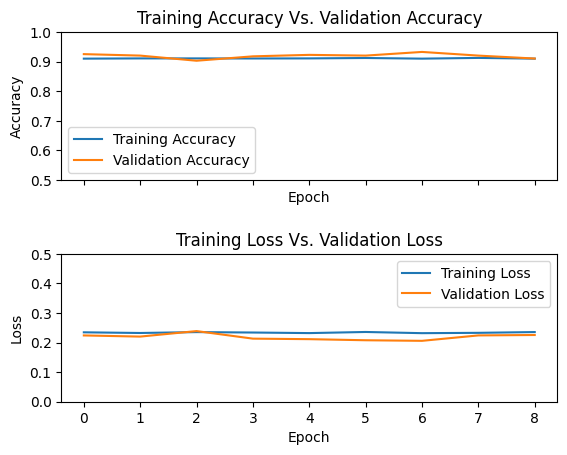

In [141]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.5)

ax[0].plot(history.history['accuracy'], label = 'Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label = 'Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylim(0.5, 1)
ax[0].set_title('Training Accuracy Vs. Validation Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label = 'Training Loss')
ax[1].plot(history.history['val_loss'], label = 'Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylim(0, 0.5)
ax[1].set_title('Training Loss Vs. Validation Loss')
ax[1].legend()

## Test the model

As we discussed in the lectures, after training on the training data and validating on the validation data, we test the final prediction power of our model by running it on the test dataset that the algorithm has NEVER seen before.

It is very important to realize that fiddling with the hyperparameters overfits the validation dataset. 

The test is the absolute final instance. You should not test before you are completely done with adjusting your model.

If you adjust your model after testing, you will start overfitting the test dataset, which will defeat its purpose.

In [130]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 5ms/step - loss: 0.2365 - accuracy: 0.9241


In [131]:
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))


Test loss: 0.24. Test accuracy: 92.41%


Using this model, we can predict if a customer will buy again with a 92% accuracy.